In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile

file_name = "/content/drive/MyDrive/archive.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style; style.use('ggplot')
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from keras.utils import to_categorical
from gensim.models import Word2Vec
from nltk.cluster import KMeansClusterer

In [ ]:
import scipy
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
train = pd.read_csv('/content/drugsComTrain_raw.csv')
test = pd.read_csv('/content/drugsComTest_raw.csv')

In [ ]:
train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [ ]:
list(train)

['uniqueID',
 'drugName',
 'condition',
 'review',
 'rating',
 'date',
 'usefulCount']

In [ ]:
train.values.shape[0], test.values.shape[0], train.values.shape[0] / test.values.shape[0]

(161297, 53766, 2.999981400885318)

In [ ]:
train.condition.unique().size, test.condition.unique().size

(885, 709)

In [ ]:
train.drugName.unique().size, test.drugName.unique().size


(3436, 2637)

In [ ]:
train.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [ ]:
train.describe()

,uniqueID,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [ ]:
train.corr()

,uniqueID,rating,usefulCount
uniqueID,1.000000,0.015185,0.016475
rating,0.015185,1.000000,0.234185
usefulCount,0.016475,0.234185,1.000000


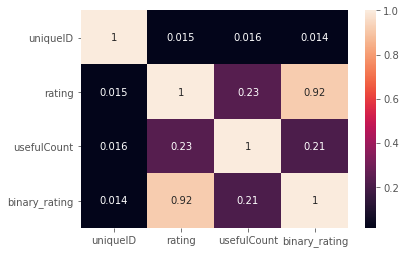

In [ ]:
sns.heatmap(train.corr(),annot=True)

#Data Visualization

In [ ]:
conditions = train.condition.value_counts().sort_values(ascending=False)
conditions[:10]

Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Insomnia            3673
Weight Loss         3609
Obesity             3568
ADHD                3383
Name: condition, dtype: int64

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]

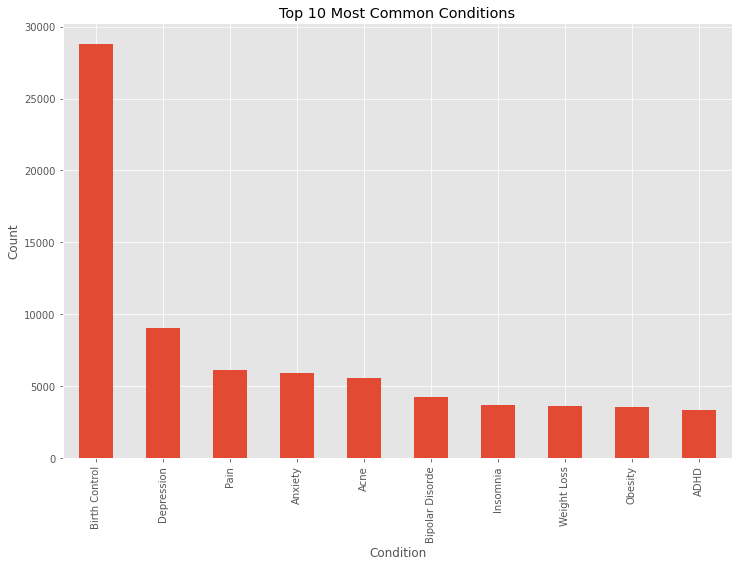

In [ ]:
conditions[:10].plot(kind='bar')
plt.title('Top 10 Most Common Conditions')
plt.xlabel('Condition')
plt.ylabel('Count');

###Rating Distribution

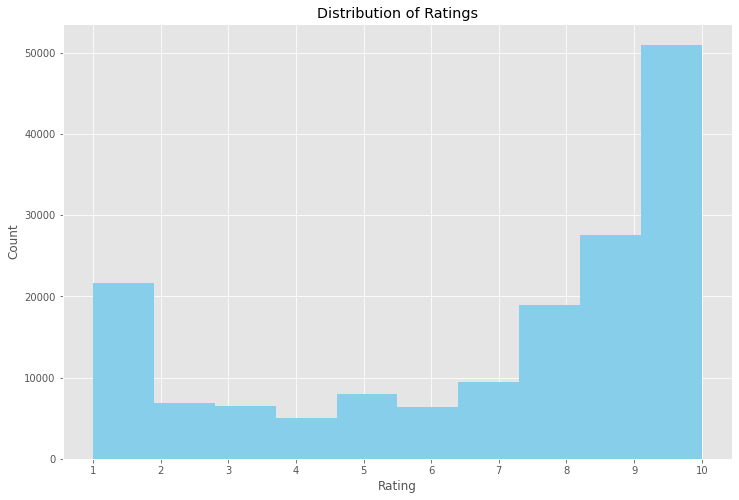

In [ ]:
train.rating.hist(color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks([i for i in range(1, 11)]);

Text(0, 0.5, 'Count')

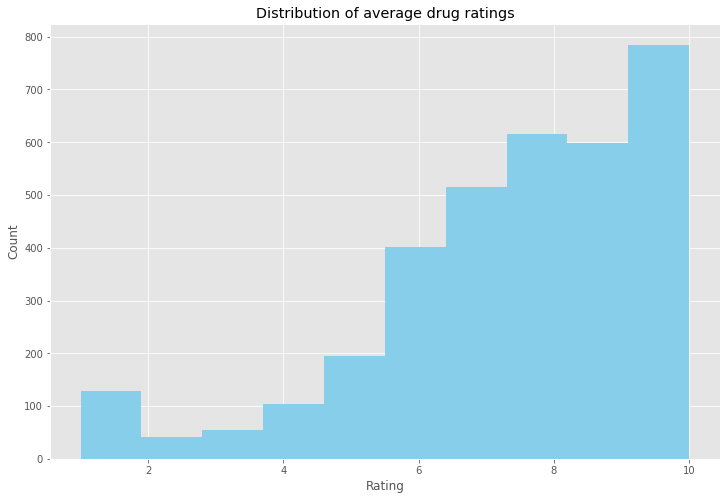

In [ ]:
rating_avgs = (train['rating'].groupby(train['drugName']).mean())
rating_avgs.hist(color='skyblue')
plt.title('Distribution of average drug ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

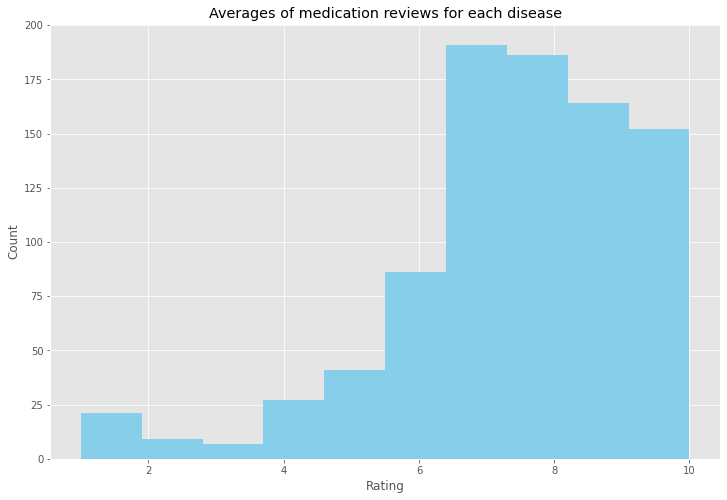

In [ ]:
rating_avgs = (train['rating'].groupby(train['condition']).mean())
rating_avgs.hist(color='skyblue')
plt.title('Averages of medication reviews for each disease')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

###Usefulness vs Rating

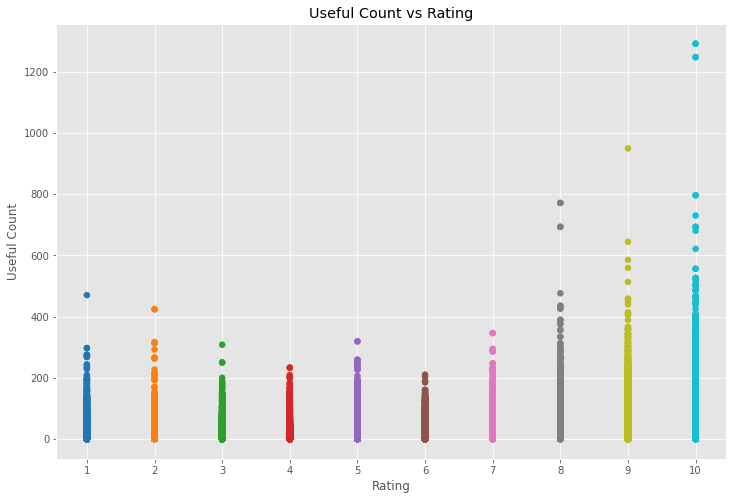

In [ ]:
plt.scatter(train.rating, train.usefulCount, c=train.rating.values, cmap='tab10')
plt.title('Useful Count vs Rating')
plt.xlabel('Rating')
plt.ylabel('Useful Count')
plt.xticks([i for i in range(1, 11)]);

In [ ]:
use_ls = []

for i in range(1, 11):
    use_ls.append([i, np.sum(train[train.rating == i].usefulCount) / np.sum([train.rating == i])])
    
use_arr = np.asarray(use_ls)

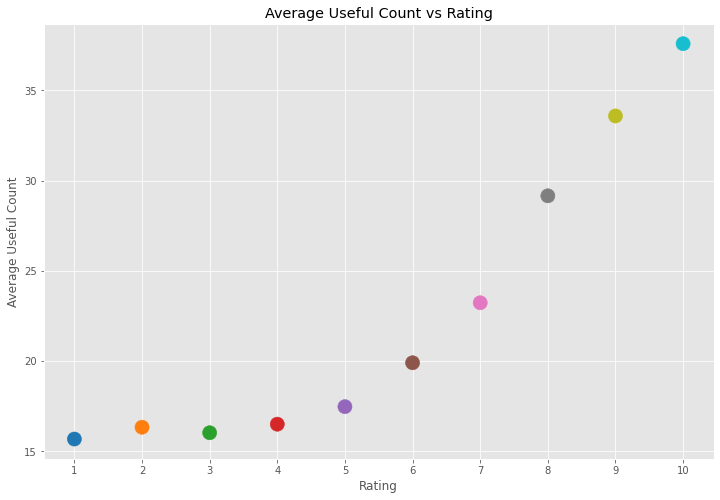

In [ ]:
plt.scatter(use_arr[:, 0], use_arr[:, 1], c=use_arr[:, 0], cmap='tab10', s=200)
plt.title('Average Useful Count vs Rating')
plt.xlabel('Rating')
plt.ylabel('Average Useful Count')
plt.xticks([i for i in range(1, 11)]);

In [ ]:
# Sort train dataframe from most to least useful
useful_train = train.sort_values(by='usefulCount', ascending=False)
useful_train.iloc[:10]

,uniqueID,drugName,condition,review,rating,date,usefulCount
6716,96616,Sertraline,Depression,"""I remember reading people&#039;s opinions, on...",10,31-Jul-08,1291
33552,119152,Zoloft,Depression,"""I remember reading people&#039;s opinions, on...",10,31-Jul-08,1291
21708,131116,Levonorgestrel,Birth Control,"""I have had my IUD for over a year now and I t...",10,1-Apr-09,1247
4249,182560,Mirena,Birth Control,"""I have had my IUD for over a year now and I t...",10,1-Apr-09,1247
146145,119151,Zoloft,Depression,"""I&#039;ve been on Zoloft 50mg for over two ye...",9,5-Aug-08,949
58608,139141,Phentermine,Weight Loss,"""I have used this pill off and on for the past...",10,19-Oct-08,796
16889,52305,Adipex-P,Weight Loss,"""I have used this pill off and on for the past...",10,19-Oct-08,796
2039,62757,Citalopram,Depression,"""I responded after one week. The side effects ...",8,25-Mar-08,771
152838,89825,Celexa,Depression,"""I responded after one week. The side effects ...",8,25-Mar-08,771
5218,107655,Implanon,Birth Control,"""I was very nervous about trying Implanon afte...",10,19-Jul-10,730


In [ ]:
# most useful reviews
for i in useful_train.review.iloc[:3]:
    print(i, '\n')

"I remember reading people&#039;s opinions, online, of the drug before I took it and it scared me away from it. Then I finally decided to give it a try and it has been the best choice I have made. I have been on it for over 4 months and I feel great. I&#039;m on 100mg and I don&#039;t have any side effects. When I first started I did notice that my hands would tremble but then it subsided. So honestly, don&#039;t listen to all the negativity because what doesn&#039;t work for some works amazing for others. So go based on youself and not everyone else. It may be a blessing in diguise. The pill is not meant to make you be all happy go lucky and see &quot;butterflies and roses&quot;, its meant to help put the chemicals in your mind in balance so you can just be who you are and not overly depressed. I still get sad some times, but that is normal, that is life, and it&#039;s up to people to take control to make a change. I did so by getting on this pill." 

"I remember reading people&#039;s

In [ ]:
# least useful reviews
for i in useful_train.review.iloc[-3:]:
    print(i, '\n')

"I received Implanon in May of 2008. I am due to have it removed in 6 months however, for the past year I have experienced decrease in sex drive, weight gain of 30lbs and also mood swings. My periods have been very scheduled and fairly regular which was great until 4-5 months ago when I missed a period then was on time the following 2 months. Last month I started a week early and it was unusually light, this month I started 2 1/2 weeks early and it has been off and on spotting for the past 5 days. I did call the helpline when I missed my period. They did not seem to concerned and I have not been able to find ANYwhere the birth rates on this specific birth control! I loved it until a year ago so the first half of my experience was great the last half no." 

"The only warning my gyno gave me was that I would be spotting for about 15 days after having the IUD inserted, which was a damn lie.  I spotted for a whole four weeks after the procedure.  My uterus chilled for two weeks before I st

### Quantifying the Sentiment

In [ ]:
sid = SentimentIntensityAnalyzer()

In [ ]:
sentiments = []

for i in train.review:
    sentiments.append(sid.polarity_scores(i).get('compound'))
    
sentiments = np.asarray(sentiments)

In [ ]:
sentiments

array([-0.296 ,  0.8603,  0.7645, ..., -0.743 ,  0.6197,  0.6124])

In [ ]:
useful_train['sentiment'] = pd.Series(data=sentiments)

In [ ]:
useful_train = useful_train.reset_index(drop=True)
useful_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,sentiment
0,96616,Sertraline,Depression,"""I remember reading people&#039;s opinions, on...",10,31-Jul-08,1291,0.9772
1,119152,Zoloft,Depression,"""I remember reading people&#039;s opinions, on...",10,31-Jul-08,1291,0.9772
2,131116,Levonorgestrel,Birth Control,"""I have had my IUD for over a year now and I t...",10,1-Apr-09,1247,0.7739
3,182560,Mirena,Birth Control,"""I have had my IUD for over a year now and I t...",10,1-Apr-09,1247,0.7739
4,119151,Zoloft,Depression,"""I&#039;ve been on Zoloft 50mg for over two ye...",9,5-Aug-08,949,-0.6815


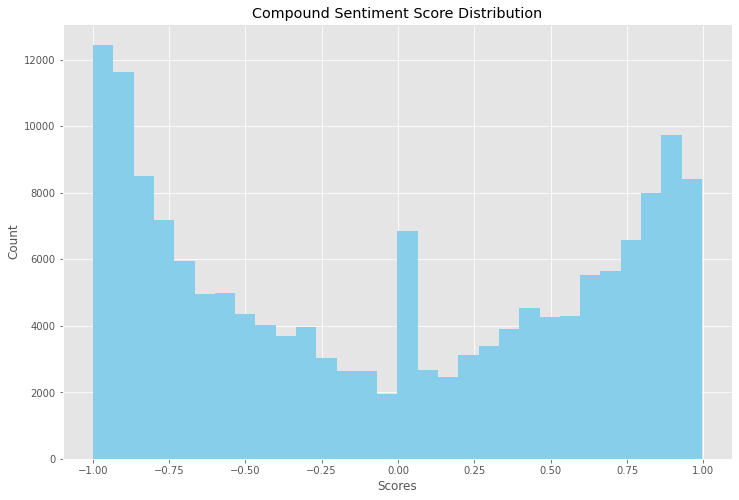

In [ ]:
useful_train.sentiment.hist(color='skyblue', bins=30)
plt.title('Compound Sentiment Score Distribution')
plt.xlabel('Scores')
plt.ylabel('Count');

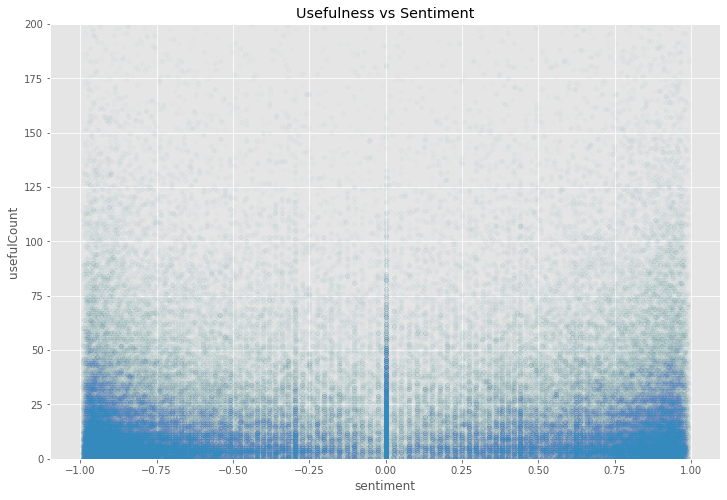

In [ ]:
useful_train.plot(x='sentiment', y='usefulCount', kind='scatter', alpha=0.01)
plt.title('Usefulness vs Sentiment')
plt.ylim(0, 200);

In [ ]:
temp_ls = []

for i in range(1, 11):
    temp_ls.append(np.sum(useful_train[useful_train.rating == i].sentiment) / np.sum(useful_train.rating == i))

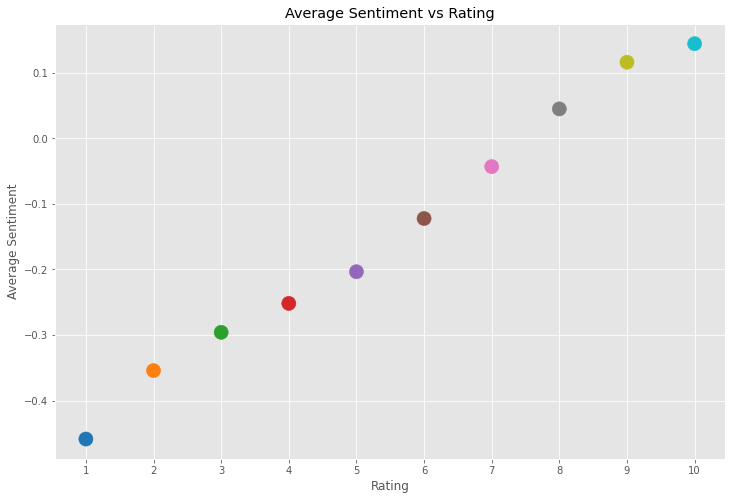

In [ ]:
plt.scatter(x=range(1, 11), y=temp_ls, c=range(1, 11), cmap='tab10', s=200)
plt.title('Average Sentiment vs Rating')
plt.xlabel('Rating')
plt.ylabel('Average Sentiment')
plt.xticks([i for i in range(1, 11)]);

In [ ]:
rate_ls = []

for i in train.drugName.unique():
    
    # Only consider drugs that have at least 10 ratings
    if np.sum(train.drugName == i) >= 10:
        rate_ls.append((i, np.sum(train[train.drugName == i].rating) / np.sum(train.drugName == i)))
    
avg_rate = pd.DataFrame(rate_ls)

In [ ]:
avg_rate = avg_rate.sort_values(by=[1], ascending=False).reset_index(drop=True)
avg_rate[:10]

,0,1
0,Zutripro,10.000000
1,Chlorpheniramine / hydrocodone / pseudoephedrine,10.000000
2,Silver sulfadiazine,9.972222
3,Drixoral Cold and Allergy,9.948718
4,Dexbrompheniramine / pseudoephedrine,9.947368
5,Emend,9.900000
6,Aprepitant,9.900000
7,Tegaserod,9.812500
8,Zelnorm,9.687500
9,Cyanocobalamin,9.666667


In [ ]:
avg_rate[-10:]

,0,1
1371,Prevnar 13,3.363636
1372,Fosamax,3.166667
1373,Blisovi 24 Fe,3.088889
1374,Opdivo,3.083333
1375,Miconazole,3.033000
1376,Monistat 7,3.032258
1377,Alendronate,2.954545
1378,Yuvafem,2.318182
1379,Monistat 1-Day or Night Combination Pack,1.416667
1380,ProAir RespiClick,1.193548


##Best and Worst Drugs by Condition

In [ ]:
help_dict = {}

# Iterate over conditions
for i in train.condition.unique():
    
    temp_ls = []
    
    # Iterate over drugs within a given condition
    for j in train[train.condition == i].drugName.unique():
        
        # If there are at least 10 reviews for a drug, save its name and average rating in temporary list
        if np.sum(train.drugName == j) >= 10:
            temp_ls.append((j, np.sum(train[train.drugName == j].rating) / np.sum(train.drugName == j)))
        
    # Save temporary list as a dataframe as a value in help dictionary, sorted best to worst drugs
    help_dict[i] = pd.DataFrame(data=temp_ls, columns=['drug', 'average_rating']).sort_values(by='average_rating', ascending=False).reset_index(drop=True)

In [ ]:
help_dict['Birth Control'].iloc[:10]

,drug,average_rating
0,Plan B,8.674917
1,Lybrel,7.600000
2,Ortho Evra,7.470320
3,Kyleena,7.463576
4,Levonorgestrel,7.391031
5,Ortho-Cept,7.250000
6,Skyla,7.246359
7,Copper,7.235197
8,Beyaz,7.042553
9,Dienogest / estradiol,6.875000


In [ ]:
help_dict['Acne'].iloc[:10]

,drug,average_rating
0,Benzoyl peroxide,8.869565
1,Benzaclin,8.865385
2,Milk of Magnesia,8.833333
3,Benzoyl peroxide / erythromycin,8.750000
4,Magnesium hydroxide,8.710000
5,Accutane,8.427273
6,Isotretinoin,8.392453
7,Onexton,8.357143
8,Retin-A,8.342857
9,Atralin,8.250000


In [ ]:
help_dict['Acne'].iloc[-10:]

,drug,average_rating
64,Ethinyl estradiol / norethindrone,5.591930
65,Sulfamethoxazole / trimethoprim,5.557875
66,Junel Fe 1 / 20,5.404545
67,Loryna,5.162791
68,Tri-Previfem,4.984615
69,Junel Fe 1.5 / 30,4.961538
70,Gildess Fe 1.5 / 30,4.791667
71,SMZ-TMP DS,4.666667
72,Gildess Fe 1 / 20,4.594286
73,Estarylla,3.707317


#Classification using ML Models

### Vectorization

In [ ]:
# Creates TF-IDF vectorizer and transforms the corpus
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train.review)

# transforms test reviews to above vectorized format
X_test = vectorizer.transform(test.review)

### Multinomial Naive Bayes

In [ ]:
train['binary_rating'] = train['rating'] > 5

y_train_rating = train.binary_rating
clf = MultinomialNB().fit(X_train, y_train_rating)

In [ ]:
test['binary_rating'] = test.rating > 5
y_test_rating = test.binary_rating

In [ ]:
pred = clf.predict(X_test)

In [ ]:
print("Accuracy: %s" % str(clf.score(X_test, y_test_rating)))

Accuracy: 0.7527247703009337


In [ ]:
print("Confusion Matrix")
print(confusion_matrix(pred, y_test_rating))

Confusion Matrix
[[ 3233   321]
 [12974 37238]]


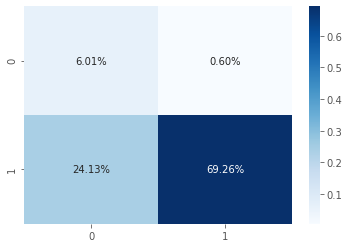

In [ ]:
cf_matrix = confusion_matrix(pred,y_test_rating)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')

###Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train_rating)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred = logreg.predict(X_test)

In [ ]:
print("Accuracy: %s" % str(logreg.score(X_test, y_test_rating)))

Accuracy: 0.8493471710746568


In [ ]:
print("Confusion Matrix")
print(confusion_matrix(pred, y_test_rating))

Confusion Matrix
[[10885  2778]
 [ 5322 34781]]


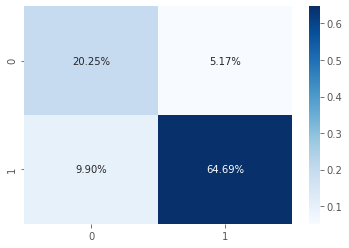

In [ ]:
cf_matrix = confusion_matrix(pred,y_test_rating)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')

###K-Nearest Neighbour

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train_rating)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
pred = knn.predict(X_test)

In [ ]:
print("Accuracy: %s" % str(knn.score(X_test, y_test_rating)))

Accuracy: 0.7036789048841275


In [ ]:
print("Confusion Matrix")
print(confusion_matrix(pred, y_test_rating))

Confusion Matrix
[[  464   189]
 [15743 37370]]


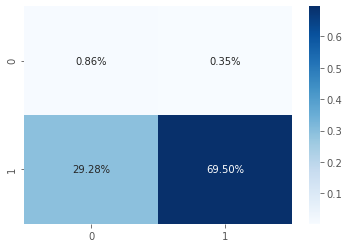

In [ ]:
cf_matrix = confusion_matrix(pred,y_test_rating)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')

###Random Forest

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42, max_depth = 10000, min_samples_split = 0.001)
rfc.fit(X_train, y_train_rating)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10000, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.001,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
pred = rfc.predict(X_test)

In [ ]:
print("Accuracy: %s" % str(rfc.score(X_test, y_test_rating)))

Accuracy: 0.8310084439980657


In [ ]:
print("Confusion Matrix")
print(confusion_matrix(pred, y_test_rating))

Confusion Matrix
[[ 7252   131]
 [ 8955 37428]]


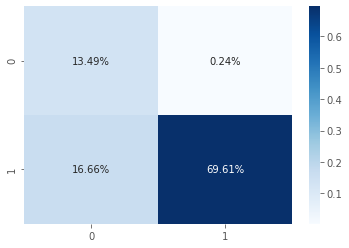

In [ ]:
cf_matrix = confusion_matrix(pred,y_test_rating)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')

##Classification with Keras

In [ ]:
b = "'@#$%^()&*;!.-"
X_train = np.array(train['review'])
X_test = np.array(test['review'])

def clean(X):
    for index, review in enumerate(X):
        for char in b:
            X[index] = X[index].replace(char, "")
    return(X)

X_train = clean(X_train)
X_test = clean(X_test)
print(X_train[:2])

['"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"'
 '"My son is halfway through his fourth week of Intuniv We became concerned when he began this last week, when he started taking the highest dose he will be on For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation very unusual for him I called his doctor on Monday morning and she said to stick it out a few days See how he did at school, and with getting up in the morning The last two days have been problem free He is MUCH more agreeable than ever He is less emotional a good thing, less cranky He is remembering all the things he should Overall his behavior is better \r\nWe have tried many different medications and so far this is the most effective"']


In [ ]:
vectorizer = CountVectorizer(binary=True, stop_words=stopwords.words('english'),lowercase=True, max_features=5000)
#vectorizer = TfidfVectorizer(binary=True, stop_words=stopwords.words('english'), lowercase=True, max_features=5000)
test_train = np.concatenate([X_train, X_test])
print(test_train.shape)
X_onehot = vectorizer.fit_transform(test_train)
stop_words = vectorizer.get_stop_words()
print(type(X_onehot))

(215063,)
<class 'scipy.sparse.csr.csr_matrix'>


In [ ]:
print(X_onehot.shape)

(215063, 5000)


In [ ]:
names_list = vectorizer.get_feature_names()
names = [[i] for i in names_list]
names = Word2Vec(names, min_count=1)
print(len(list(names.wv.vocab)))
print(list(names.wv.vocab)[:5])

5000
['00', '000', '00am', '00pm', '01']


In [ ]:
def score_transform(X):
    y_reshaped = np.reshape(X['rating'].values, (-1, 1))
    for index, val in enumerate(y_reshaped):
        if val >= 8:
            y_reshaped[index] = 1
        elif val >= 5:
            y_reshaped[index] = 2
        else:
            y_reshaped[index] = 0
    y_result = to_categorical(y_reshaped)
    return y_result
    
    print(X_onehot)

In [ ]:
y_train_test = pd.concat([train, test], ignore_index=True)
y_train = score_transform(y_train_test)
print(y_train)
print(y_train.shape)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]
(215063, 3)


In [ ]:
model = Sequential()
model.add(Dense(units=256, activation='relu', input_dim=len(vectorizer.get_feature_names())))
model.add(Dense(units = 128,activation='relu'))
model.add(Dense(units = 64,activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               1280256   
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 1,321,603
Trainable params: 1,321,603
Non-trainable params: 0
_________________________________________________________________


In [ ]:
scipy.sparse.csr_matrix.sort_indices(X_onehot)

In [ ]:
history = model.fit(X_onehot[:-53866], y_train[:-53866], epochs=6, batch_size=128, verbose=1, validation_data=(X_onehot[157382:157482], y_train[157382:157482]))

Epoch 1/6
1260/1260 [==============================] - 13s 10ms/step - loss: 0.6895 - accuracy: 0.7177 - val_loss: 0.3597 - val_accuracy: 0.9000
Epoch 2/6
1260/1260 [==============================] - 12s 10ms/step - loss: 0.3480 - accuracy: 0.8731 - val_loss: 0.1284 - val_accuracy: 0.9800
Epoch 3/6
1260/1260 [==============================] - 13s 10ms/step - loss: 0.1055 - accuracy: 0.9665 - val_loss: 0.0507 - val_accuracy: 0.9900
Epoch 4/6
1260/1260 [==============================] - 12s 10ms/step - loss: 0.0455 - accuracy: 0.9855 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 5/6
1260/1260 [==============================] - 12s 10ms/step - loss: 0.0285 - accuracy: 0.9910 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 6/6
1260/1260 [==============================] - 12s 10ms/step - loss: 0.0232 - accuracy: 0.9923 - val_loss: 0.0111 - val_accuracy: 1.0000


In [ ]:
scores = model.evaluate(X_onehot[157482:], y_train[157482:], verbose=1)

1800/1800 [==============================] - 3s 2ms/step - loss: 0.7218 - accuracy: 0.8820


In [ ]:
scores[1]

0.8819749355316162

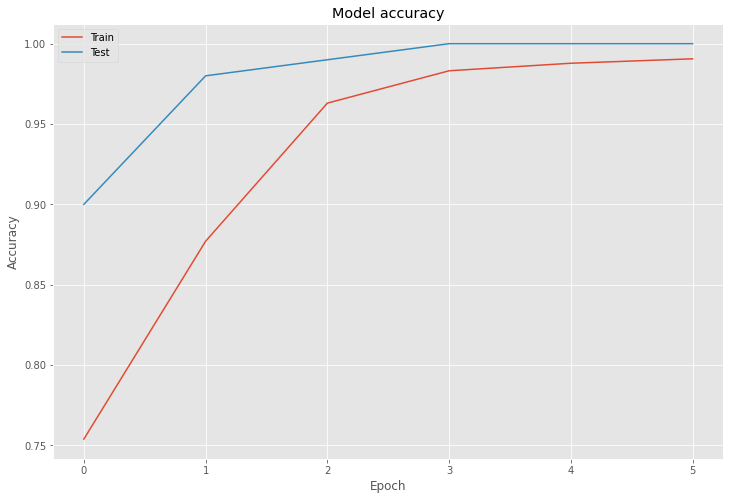

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()